In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [100]:
marketing_df = pd.read_csv('clean_marketing_data.csv')

In [101]:
marketing_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Response,Complain,Country,Children,Age,Age_Group,Total_Spent,present_date,customer_lifetime
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,0,1,0,SP,0,51,Middle_Age,1190,2021-02-08,6.7
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,1,1,0,CA,0,60,Middle_Age,577,2021-02-08,6.7
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,0,0,0,US,1,63,Senior_Citizens,251,2021-02-08,6.7
3,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,...,0,0,0,AUS,2,54,Middle_Age,11,2021-02-08,6.8
4,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,...,0,1,0,SP,1,32,Adult,91,2021-02-08,6.8


### Preprocessing the numerical variables

In [102]:
marketing_df.drop(['Age_Group'], axis=1, inplace=True)

In [103]:
marketing_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Total_Spent,present_date,customer_lifetime
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,0,0,1,0,SP,0,51,1190,2021-02-08,6.7
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,0,1,1,0,CA,0,60,577,2021-02-08,6.7
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,0,0,0,0,US,1,63,251,2021-02-08,6.7
3,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,...,0,0,0,0,AUS,2,54,11,2021-02-08,6.8
4,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,...,0,0,1,0,SP,1,32,91,2021-02-08,6.8


In [104]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [105]:
marketing_df['Education'] = le.fit_transform(marketing_df['Education'])

In [106]:
education_list= list(le.classes_)

In [107]:
education_list

['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

In [108]:
marketing_df['Marital_Status'] = le.fit_transform(marketing_df['Marital_Status'])

In [109]:
marital_list =list(le.classes_)

In [110]:
marital_list

['Absurd',
 'Alone',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow',
 'YOLO']

In [111]:
marketing_df['Country'] = le.fit_transform(marketing_df['Country'])

In [112]:
country_list =list(le.classes_)

In [113]:
country_list

['AUS', 'CA', 'GER', 'IND', 'ME', 'SA', 'SP', 'US']

In [114]:
marketing_df.drop(['Dt_Customer'], axis=1, inplace=True)

In [115]:
marketing_df.drop(['present_date'], axis=1, inplace=True)

In [116]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [117]:
marketing_data_1 = marketing_df.drop(columns=['Response'])
marketing_data_clus = StandardScaler().fit_transform(marketing_data_1)
marketing_data_cluster = pd.DataFrame(marketing_data_clus, columns = marketing_data_1.columns)


In [118]:
marketing_data_cluster 

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Children,Age,Total_Spent,customer_lifetime
0,-0.352454,-1.602398,1.294980,-0.823208,-0.929307,-1.693697,-0.344435,1.955247,0.945855,1.339972,...,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,0.694790,-1.264914,-0.092557,0.967836,-1.599987
1,-0.352454,0.254202,0.192843,-0.823208,-0.929307,-1.693697,0.471034,-0.536764,-0.459294,-0.559540,...,-0.282912,-0.280107,-0.261851,8.530338,-0.095498,-1.600776,-1.264914,0.676833,-0.049841,-1.599987
2,-0.352454,-0.674098,0.597087,-0.823208,0.908545,-1.693697,-0.507529,-0.385733,-0.481598,-0.413424,...,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,1.153903,0.069971,0.933297,-0.591052,-1.599987
3,-0.352454,1.182503,-0.785073,1.039532,0.908545,-1.693697,-0.875231,-0.662623,-0.740324,-0.687392,...,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,-2.059889,1.404857,0.163906,-0.989490,-1.420060
4,-0.352454,0.254202,-1.222051,1.039532,-0.929307,-1.693697,-0.887093,-0.259874,-0.637726,-0.486482,...,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,0.694790,0.069971,-1.716826,-0.856677,-1.420060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,1.430358,-1.602398,0.565664,-0.823208,0.908545,1.727726,0.198222,-0.209530,-0.182725,0.171041,...,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,1.153903,0.069971,-0.605484,0.136097,0.559129
2209,-2.135266,-0.674098,-0.841404,1.039532,-0.929307,1.727726,-0.890058,-0.410905,-0.686794,-0.632598,...,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,0.694790,0.069971,-0.690972,-0.916443,0.918982
2210,-0.352454,-1.602398,-0.235435,1.039532,-0.929307,1.727726,-0.356297,-0.612279,-0.352235,-0.413424,...,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,0.694790,0.069971,-0.605484,-0.494763,1.098908
2211,-0.352454,-0.674098,0.539565,-0.823208,-0.929307,1.727726,-0.113139,0.293906,2.382229,2.034024,...,-0.282912,-0.280107,-0.261851,-0.117229,-0.095498,-0.682550,-1.264914,-0.776460,1.288246,1.098908


### KMeans Clustering

In [119]:
# Using two clusters

kmeans = KMeans(n_clusters=3)
kmeans.fit(marketing_data_cluster)

KMeans(n_clusters=3)

In [120]:
# Predicting / assigning the clusters:

df_cl = marketing_data_cluster
df_cl['clusters'] = kmeans.predict(marketing_data_cluster)

# Check the size of the clusters
print(df_cl['clusters'].value_counts().sort_index())

0    1053
1     541
2     619
Name: clusters, dtype: int64


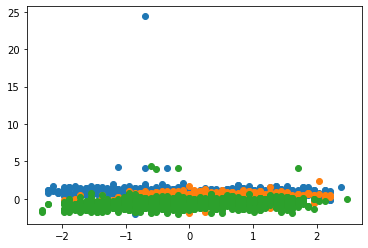

In [121]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=123)
kmeans_1 = km.fit(marketing_data_cluster)
kmeans_2 = kmeans_1.predict(marketing_data_cluster)

marketing_data_cluster['cluster']=kmeans_2
 
#marketing_data_cluster.head()

clusterval = marketing_data_cluster['cluster'].unique()
for cluster in clusterval:
    plt.scatter(marketing_data_cluster[marketing_data_cluster['cluster']==cluster]['Age'], marketing_data_cluster[marketing_data_cluster['cluster']==cluster]['Income'])
plt.show()

In [122]:
# After scaling my dataset, the ages is being difficult to interprete, I have to un-scale by concatinating my original dataset with my cluster

In [123]:
marketing_data_clustering_full = pd.concat([marketing_df, marketing_data_cluster['cluster']], axis=1)

In [124]:
marketing_data_clustering_full

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Total_Spent,customer_lifetime,cluster
0,2,2,84835.0,0,0,0,189,104,379,111,...,0,0,1,0,6,0,51,1190,6.7,1
1,2,4,57091.0,0,0,0,464,5,64,7,...,0,1,1,0,1,0,60,577,6.7,0
2,2,3,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,7,1,63,251,6.7,2
3,2,5,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,0,2,54,11,6.8,2
4,2,4,21474.0,1,0,0,6,16,24,11,...,0,0,1,0,6,1,32,91,6.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,4,2,66476.0,0,1,99,372,18,126,47,...,0,0,0,0,7,1,45,689,7.9,0
2209,0,3,31056.0,1,0,99,5,10,13,3,...,0,0,0,0,6,1,44,55,8.1,2
2210,2,2,46310.0,1,0,99,185,2,88,15,...,0,0,0,0,6,1,45,309,8.2,2
2211,2,3,65819.0,0,0,99,267,38,701,149,...,0,0,0,0,3,0,43,1383,8.2,1


In [125]:
marketing_data_clustering_full['cluster'].value_counts()

2    1053
0     619
1     541
Name: cluster, dtype: int64

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


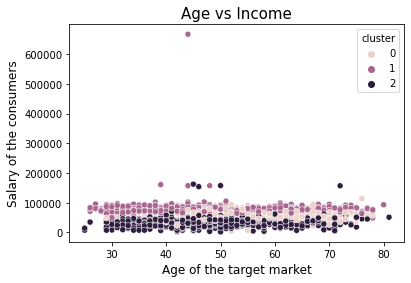

In [126]:
 # to plot the clusters:
import seaborn as sns
sns.scatterplot(marketing_data_clustering_full['Age'],marketing_data_clustering_full['Income'],hue='cluster',data=marketing_data_clustering_full) 
plt.title("Age vs Income", fontsize=15)
plt.xlabel("Age of the target market", fontsize=12)
plt.ylabel("Salary of the consumers", fontsize=12)
plt.show()

Cluster 0: They are the medium salary earners, over $90,000, and a few anomaly earn little above $100, 000.

Cluster 1: They are the highest salary earners, majority of the customers in this cluster earn over $100, 000, and a few anomaly earn almost $200,000, and the richest more than $600, 000.

Cluster 2: They are the lowest salary earners, below $90,000.

In [127]:
#cluster 2: the earn below 60,000 and they are between 25 and 80 years, and few anamaly earns little above 180,000
# cluster 0: like 90,00
#cluster 1: are the highest earners, little above 100, 000
#possible anomaly of a custormer of age app 45 who earnns above 600,000
#also other anomalies like someone who is above 120years and who earns around 100,000.


In [128]:
#marketing_data_clustering_full

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


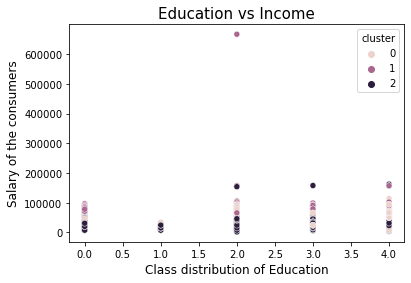

In [129]:
# to plot the clusters:
import seaborn as sns
sns.scatterplot(marketing_data_clustering_full['Education'],marketing_data_clustering_full['Income'],hue='cluster',data=marketing_data_clustering_full) 
plt.title("Education vs Income", fontsize=15)
plt.xlabel("Class distribution of Education", fontsize=12)
plt.ylabel("Salary of the consumers", fontsize=12)
plt.show()

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


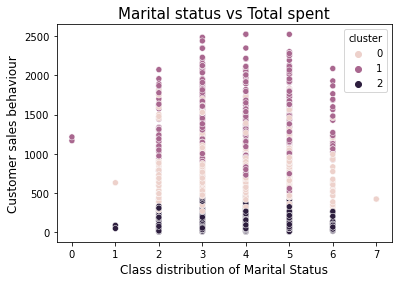

In [130]:
sns.scatterplot(marketing_data_clustering_full['Marital_Status'],marketing_data_clustering_full['Total_Spent'],hue='cluster',data=marketing_data_clustering_full) 
plt.title("Marital status vs Total spent", fontsize=15)
plt.xlabel("Class distribution of Marital Status", fontsize=12)
plt.ylabel("Customer sales behaviour", fontsize=12)
plt.show()

In [131]:
print(marital_list)

['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']


C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


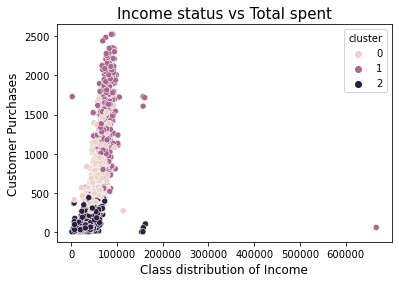

In [132]:
sns.scatterplot(marketing_data_clustering_full['Income'],marketing_data_clustering_full['Total_Spent'],hue='cluster',data=marketing_data_clustering_full) 
plt.title("Income status vs Total spent", fontsize=15)
plt.xlabel("Class distribution of Income", fontsize=12)
plt.ylabel("Customer Purchases", fontsize=12)
plt.show()

Cluster 0: The medium salary earners, and medium total purchases.

Cluster 1: The highest salary earners, and ofcourse, the highest total purchases was done by this cluster.

cluster 2: The lowest salary earners, and has the lowest total purchases.

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


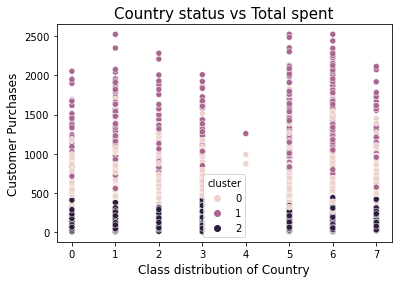

In [133]:
sns.scatterplot(marketing_data_clustering_full['Country'],marketing_data_clustering_full['Total_Spent'],hue='cluster',data=marketing_data_clustering_full) 
plt.title("Country status vs Total spent", fontsize=15)
plt.xlabel("Class distribution of Country", fontsize=12)
plt.ylabel("Customer Purchases", fontsize=12)
plt.show()

K-Means clustering with  4 different clusters (random choice).

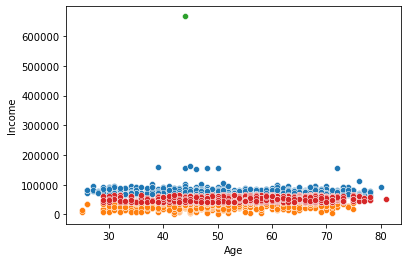

In [134]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(marketing_data_clustering_full)

marketing_data_clustering_full['cluster'] = kmeans.predict(marketing_data_clustering_full)

clusterval = np.unique(marketing_data_clustering_full['cluster'])
for cluster in clusterval:
    sns.scatterplot(x = marketing_data_clustering_full[marketing_data_clustering_full['cluster']==cluster]['Age'], y = marketing_data_clustering_full[marketing_data_clustering_full['cluster']==cluster]['Income'])
plt.show()

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


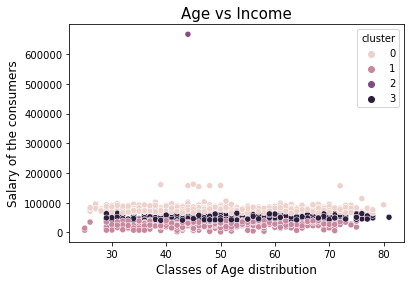

In [135]:
sns.scatterplot(marketing_data_clustering_full['Age'],marketing_data_clustering_full['Income'],hue='cluster',data=marketing_data_clustering_full) 
plt.title("Age vs Income", fontsize=15)
plt.xlabel("Classes of Age distribution", fontsize=12)
plt.ylabel("Salary of the consumers", fontsize=12)
plt.show()

Elbow plot using inertia

[1, 2, 3, 4, 5, 6, 7, 8]
[1403511913157.5596, 674650013470.6141, 319433977084.5188, 183328318387.861, 122545376637.09996, 81252897810.61885, 53747983518.710365, 40302609129.81546]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

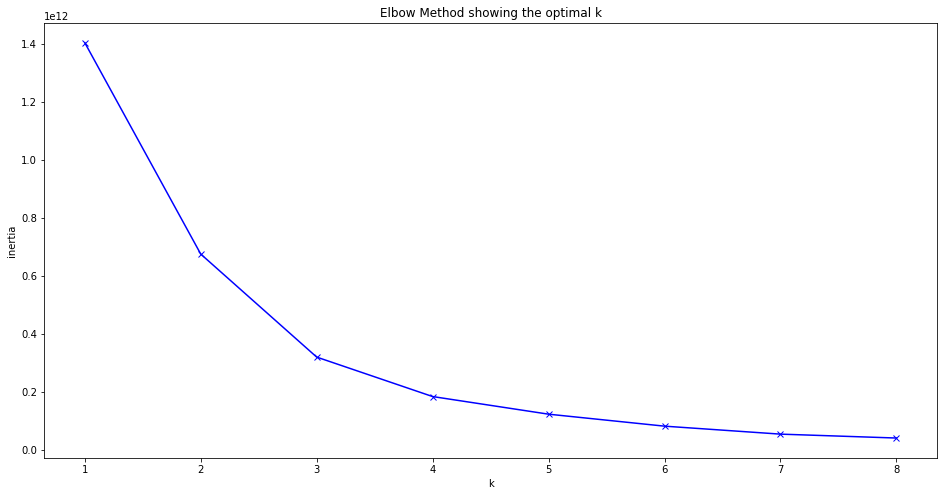

In [136]:
K = range(1, 9)
print(list(K)) 
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(marketing_data_clustering_full)
    inertia.append(kmeans.inertia_)
    
print(inertia) # This shows the average squared distance from each point to its centroids

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # plotting K against the number of inertia
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at k=3.

#### Silhouette Score

[2, 3, 4, 5, 6, 7, 8]
[0.6009887239897483, 0.6055539711248217, 0.5402519926654424, 0.5286059597644323, 0.5363300803248037, 0.5365937199301599, 0.518823344674909]


Text(0.5, 1.0, 'silhouette score showing the optimal k')

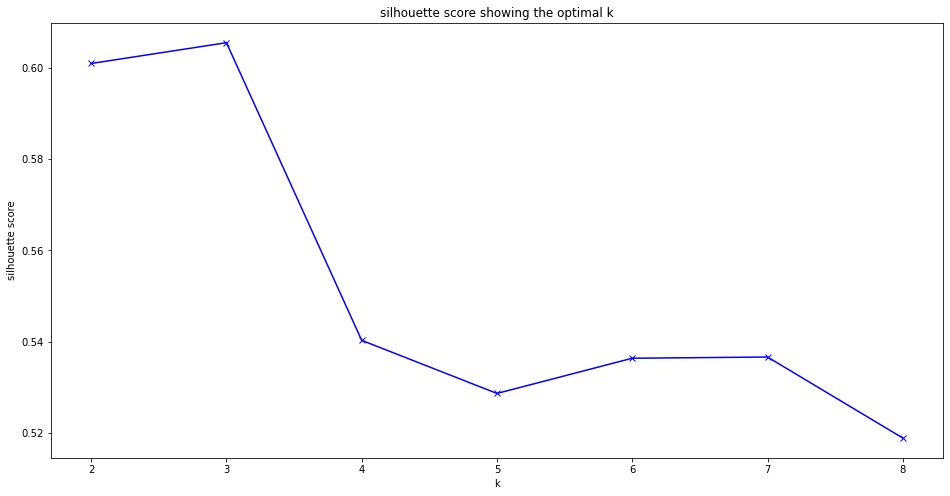

In [137]:
from sklearn.metrics import silhouette_score

K = range(2, 9)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(marketing_data_clustering_full)
    silhouette.append(silhouette_score(marketing_data_clustering_full, kmeans.predict(marketing_data_clustering_full)))
    
print(list(K))
print(silhouette)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('silhouette score showing the optimal k')


The silhouette score also has an upward spike at 3. This business model has a better cluster for 3.

#### Hierarchical Clustering (Agglomerative)

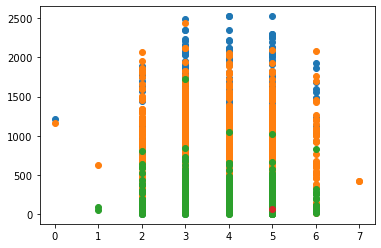

In [138]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
marketing_data_clustering_full2 = pd.DataFrame(marketing_data_clustering_full)
marketing_data_clustering_full2['cluster'] = model.fit_predict(marketing_data_clustering_full)
# create scatter plot for samples from each cluster
clusterval = marketing_data_clustering_full2['cluster'].unique()
for cluster in clusterval:
    plt.scatter(marketing_data_clustering_full2[marketing_data_clustering_full2['cluster']==cluster]['Marital_Status'], marketing_data_clustering_full2[marketing_data_clustering_full2['cluster']==cluster]['Total_Spent'])
plt.show()

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


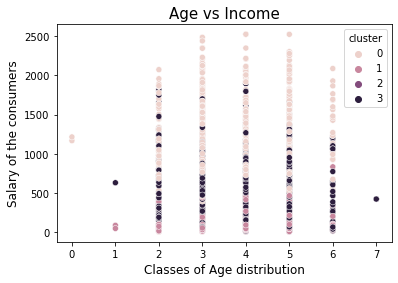

In [139]:
sns.scatterplot(marketing_data_clustering_full['Marital_Status'],marketing_data_clustering_full['Total_Spent'],hue='cluster',data=marketing_data_clustering_full) 
plt.title("Age vs Income", fontsize=15)
plt.xlabel("Classes of Age distribution", fontsize=12)
plt.ylabel("Salary of the consumers", fontsize=12)
plt.show()

Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

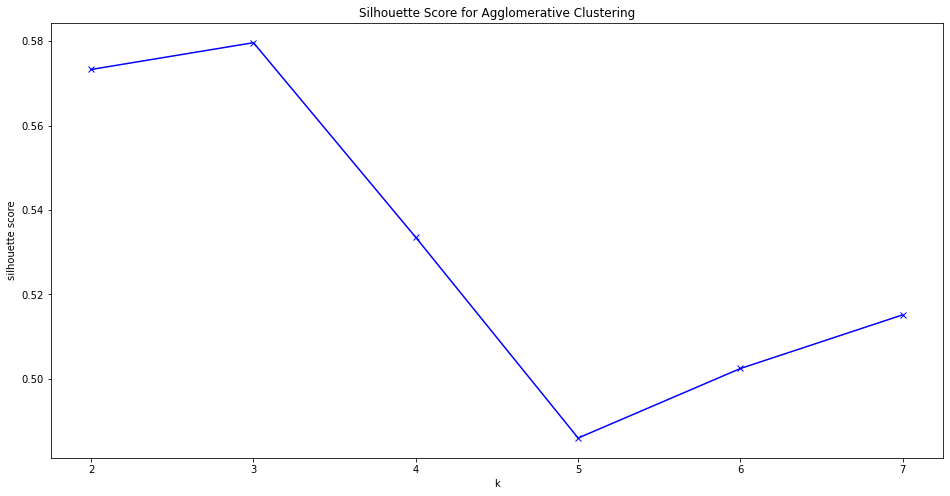

In [140]:
K = range(2, 8)
silhouette_hc = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(marketing_data_clustering_full)
    silhouette_hc.append(silhouette_score(marketing_data_clustering_full, model.fit_predict(marketing_data_clustering_full)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_hc, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

The upward spike is on 3

### Evaluating Unsupervised Learning Algorithms

In [141]:
model = KMeans(n_clusters=3)
clusters = model.fit_predict(marketing_data_clustering_full)
print('silhouette_score for 3 clusters:', silhouette_score(marketing_data_clustering_full, clusters))

silhouette_score for 3 clusters: 0.6055539736130003


In [142]:
model = AgglomerativeClustering(n_clusters=4)
clusters = model.fit_predict(marketing_data_clustering_full)
print('silhoutte score for 4 clusters:', silhouette_score(marketing_data_clustering_full, clusters))

silhoutte score for 4 clusters: 0.5335114953748243


KMeans gives a better silhouette_score of 60%, while silhouette_score for Hierarchical is 58%

### PCA
PCA is fundamentally a dimensionality reduction algorithm.

In [143]:
from sklearn.decomposition import PCA

pca_marketing = PCA(n_components=9)
pca_marketing.fit(marketing_data_clustering_full)
components = pca_marketing.transform(marketing_data_clustering_full)
pd.DataFrame(components)

,0,1,2,3,4,5,6,7,8
0,32602.671313,92.803648,323.316600,-249.904252,61.796005,75.782655,49.985038,61.015652,-0.864796
1,4853.730531,71.346982,-198.448277,31.621756,10.120857,-12.738918,47.431495,5.349507,-5.980338
2,15020.191872,689.390747,-34.133573,11.441086,7.686676,-13.867073,46.827105,2.284572,-10.027017
3,-19771.951532,321.774755,4.463335,25.036121,-11.386490,-6.319668,47.302681,7.786924,-3.996160
4,-30768.645558,43.728620,51.269427,-10.707591,7.813701,-6.345939,50.103535,-1.906239,16.843956
...,...,...,...,...,...,...,...,...,...
2208,14238.618902,171.713881,-71.569103,-44.700406,17.450502,8.353149,-52.345185,12.100599,9.230741
2209,-21188.955378,255.975069,27.508864,4.929890,-1.268173,13.186160,-47.874455,-10.862648,6.498114
2210,-5931.738495,221.551111,-20.348990,34.652261,-3.723510,-1.889524,-50.623298,-6.142125,7.324157
2211,13595.184079,-533.063743,528.910459,-24.641578,-41.745643,22.100328,-60.989855,76.741643,5.805776


In [144]:
pca = PCA(7)  # project from 31 to 7 dimensions
projected = pca.fit_transform(marketing_data_clustering_full)
print(marketing_data_clustering_full.shape)
print(projected.shape)

(2213, 30)
(2213, 7)


In [145]:
round(pd.DataFrame(pca_marketing.explained_variance_ratio_), 5)

,0
0,0.99950
1,0.00044
2,0.00005
3,0.00001
4,0.00000
5,0.00000
6,0.00000
7,0.00000
8,0.00000


Variance ratio of the newly generated components are depicted . It shows that the 1st component explains 99% of the variance in the data, the 2nd variable explain less than 2%, etc. All together we take 5 components as these 5 will explain 100% of variance in the data.

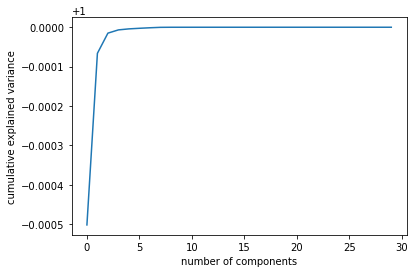

In [146]:
pca = PCA().fit(marketing_data_clustering_full)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 31-dimensional variance is contained within the first N components. For example, we see that with the marketing_dataset, the first 3 components contain approximately 80% of the variance, while we need less components to describe close to 100% of the variance.

Here we see that our 9-dimensional projection did not really lose a lot of information (as measured by the explained variance)  Looking at this plot for a high-dimensional dataset, it can help us understand the level of redundancy present in multiple observations.

In [147]:
marketing_data_clustering_full.to_csv('marketing_df.csv', index=False)